In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

# To remove warnings related to type change
pd.options.mode.chained_assignment = None  

import warnings
warnings.filterwarnings('ignore')

# Training data 
df = pd.read_csv("training_data/car_data.csv")

# no of elements in model
print("total no of elemets - ",df.shape)

total no of elemets -  (892, 6)


In [2]:
# Create Predict set for final prediction
predict_data_set = df[df['Price']=='Ask For Price']
df = df[df['Price'] != 'Ask For Price']
predict_data_set.head()

,name,company,year,Price,kms_driven,fuel_type
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
69,I want to sell my car Tata Zest,I,2017,Ask For Price,NaN,NaN
85,I want to sell my car Tata Zest,I,2017,Ask For Price,NaN,NaN
138,Maruti Suzuki Alto 800 Lxi,Maruti,2018,Ask For Price,"28,028 kms",Petrol


In [3]:
# Null implification find all null cols
df.isnull().sum() == df.shape[0] 

name          False
company       False
year          False
Price         False
kms_driven    False
fuel_type     False
dtype: bool

In [4]:
# Null values in rows
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    38
fuel_type     41
dtype: int64

In [5]:
# We are going to drop those null values as we need those col for predictions
df = df[df['fuel_type'].isnull() == False ]
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [6]:
df.head(),df.shape

(                                     name   company  year     Price  \
 0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007    80,000   
 1                 Mahindra Jeep CL550 MDI  Mahindra  2006  4,25,000   
 3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014  3,25,000   
 4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014  5,75,000   
 6                               Ford Figo      Ford  2012  1,75,000   
 
    kms_driven fuel_type  
 0  45,000 kms    Petrol  
 1      40 kms    Diesel  
 3  28,000 kms    Petrol  
 4  36,000 kms    Diesel  
 6  41,000 kms    Diesel  ,
 (816, 6))

In [7]:
# Droping company name as its not needed
df.drop(['company'], axis=True, inplace = True)
df.head()

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000","36,000 kms",Diesel
6,Ford Figo,2012,"1,75,000","41,000 kms",Diesel


In [8]:
# Spliting kms frm kms_driven
df['kms'] = df['kms_driven'].str.split(" ")
df['kms'] = df['kms_driven'].str.split(" ",n = 0,expand = True)
df.drop(['kms_driven'], axis=True, inplace = True)
df.head()

,name,year,Price,fuel_type,kms
0,Hyundai Santro Xing XO eRLX Euro III,2007,"80,000",Petrol,"45,000"
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",Diesel,40
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000",Petrol,"28,000"
4,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000",Diesel,"36,000"
6,Ford Figo,2012,"1,75,000",Diesel,"41,000"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       816 non-null    object
 1   year       816 non-null    object
 2   Price      816 non-null    object
 3   fuel_type  816 non-null    object
 4   kms        816 non-null    object
dtypes: object(5)
memory usage: 38.2+ KB


In [10]:
# Converting data to known format
import re
df.replace(',','',regex=True, inplace = True)
df.head()

,name,year,Price,fuel_type,kms
0,Hyundai Santro Xing XO eRLX Euro III,2007,80000,Petrol,45000
1,Mahindra Jeep CL550 MDI,2006,425000,Diesel,40
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,325000,Petrol,28000
4,Ford EcoSport Titanium 1.5L TDCi,2014,575000,Diesel,36000
6,Ford Figo,2012,175000,Diesel,41000


In [11]:
df[["year", "Price",'kms']] = df[["year", "Price",'kms']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       816 non-null    object
 1   year       816 non-null    int64 
 2   Price      816 non-null    int64 
 3   fuel_type  816 non-null    object
 4   kms        816 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.2+ KB


In [12]:
df.nunique()
df['Price'] = df['Price']/100000
df['Price']

0      0.80
1      4.25
3      3.25
4      5.75
6      1.75
       ... 
883    2.70
885    1.10
886    3.00
888    2.60
889    3.90
Name: Price, Length: 816, dtype: float64

In [13]:
# Create target variable 
df['Target'] = df['Price']
df.drop(['Price'], axis=True, inplace = True)
df.columns

Index(['name', 'year', 'fuel_type', 'kms', 'Target'], dtype='object')

In [14]:
# target encoding on name and label on fuel_type
from category_encoders import TargetEncoder
name_encoder = TargetEncoder()
name_encoder.fit(df['name'], df['Target'])

df['name_enc'] = name_encoder.transform(df['name'])
df.drop(['name'], axis = True, inplace = True)

from sklearn.preprocessing import LabelEncoder
fuel_type_encoder = LabelEncoder()
fuel_type_encoder.fit(df['fuel_type'])

df['fuel_type_enc'] = fuel_type_encoder.transform(df['fuel_type'])
df.drop(['fuel_type'], axis = True, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           816 non-null    int64  
 1   kms            816 non-null    int64  
 2   Target         816 non-null    float64
 3   name_enc       816 non-null    float64
 4   fuel_type_enc  816 non-null    int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 75.1 KB


In [15]:
# Spliting data set 
from sklearn.model_selection import train_test_split

# now we will split data 
X = df.drop(['Target'], axis = 1)
y = df['Target']

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.2, random_state = 0 , shuffle = False)

X_train.shape, X_test.shape , df.shape

((652, 4), (164, 4), (816, 5))

<AxesSubplot:xlabel='Target', ylabel='Density'>

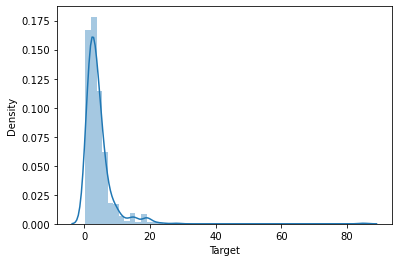

In [16]:
# EDA
sns.distplot(y_train)

<AxesSubplot:xlabel='Target'>

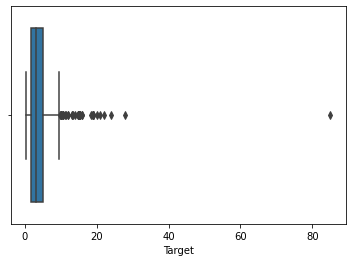

In [17]:
sns.boxplot(y_train)

In [18]:
# Outliers handel 
data=X_train.merge(y_train,on = X_train.index)
data.Target.describe()

count    652.000000
mean       4.257018
std        4.906309
min        0.300000
25%        1.850000
50%        3.200000
75%        5.000000
max       85.000030
Name: Target, dtype: float64

In [19]:
Q1 = data.Target.quantile(0.25)
Q3 = data.Target.quantile(0.75)

Q1, Q3

(1.85, 5.0)

In [20]:
iqr = Q3-Q1
iqr

3.15

In [21]:
lower_limit = Q1 - 1.5*iqr
upper_limit = Q3 + 1.5*iqr
lower_limit, upper_limit

(-2.8749999999999996, 9.725)

In [22]:
# outliers in train data
data[(data.Target<lower_limit)|(data.Target>upper_limit)].shape

(45, 6)

<AxesSubplot:xlabel='Target'>

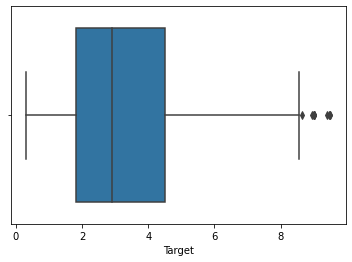

In [23]:
data = data[(data.Target>lower_limit) & (data.Target<upper_limit)]
X_train = data.drop(['Target','key_0'], axis=1)
y_train = data['Target']
sns.boxplot(data.Target)

<AxesSubplot:xlabel='Target', ylabel='fuel_type_enc'>

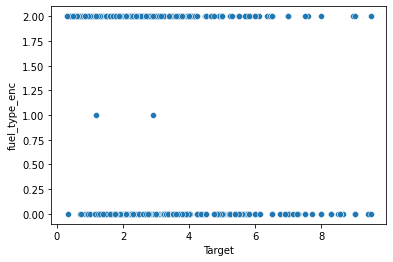

In [24]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="Target", y="fuel_type_enc")

<AxesSubplot:xlabel='Target', ylabel='name_enc'>

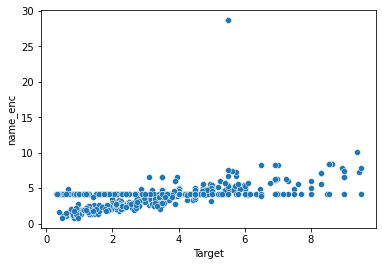

In [25]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="Target", y="name_enc")

<AxesSubplot:xlabel='Target', ylabel='kms'>

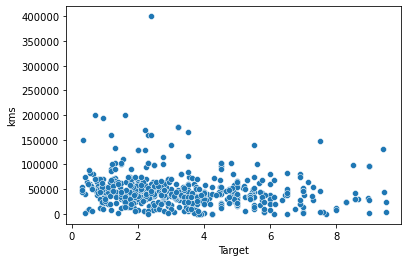

In [26]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="Target", y="kms")

In [27]:
X_train.nunique(), X_train.shape

(year              21
 kms              202
 name_enc         154
 fuel_type_enc      3
 dtype: int64,
 (607, 4))

<AxesSubplot:>

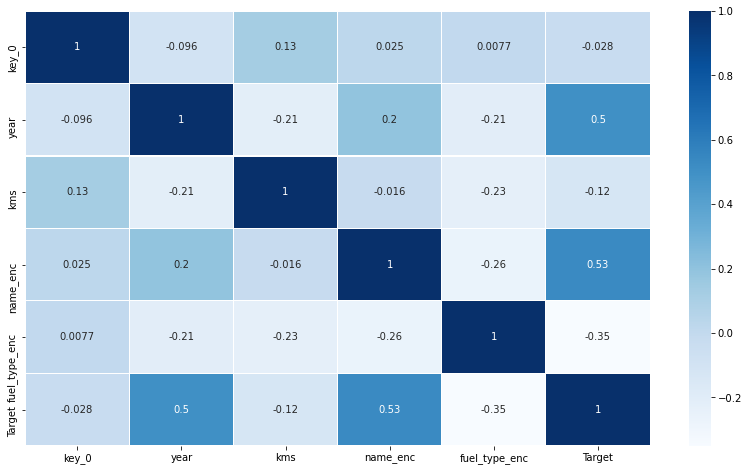

In [28]:
# Finding all correlations with help of heatmap 

corr=X_train.merge(y_train, on = X_train.index ).corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True,linewidths=0.1,vmax=1.0, cmap=plt.cm.Blues)

In [29]:
# no correlation forund we will try to find variance threshold
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit_transform(X_train)
sel.variances_

array([1.45700708e+01, 1.19593999e+09, 3.90255957e+00, 9.94096876e-01])

In [30]:
# no var is near 0 so we will skip both 

In [31]:
# Predictions
# linear regresion

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
base_model = LinearRegression()
base_model.fit(X_train, y_train)

y_predict = base_model.predict(X_test)
a = round(base_model.score(X_train,y_train)*100,2)

# Finding mean sq err
(mean_squared_error(y_test, y_predict, squared=False)),(round(a,2),'%')

(3.60632029116569, (47.42, '%'))

<AxesSubplot:xlabel='Predicted', ylabel='Actuals'>

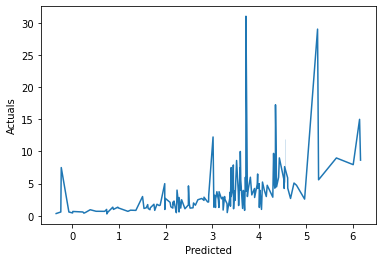

In [32]:
met = pd.DataFrame(zip(y_predict , y_test),columns=['Predicted','Actuals'])

# we will use graph to check how far are we off from our actual parameters
sns.lineplot( x=met['Predicted'], y=met["Actuals"])

In [33]:
met.nunique()

Predicted    159
Actuals       95
dtype: int64

In [34]:
# Tree method
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

y_predict2 = regressor.predict(X_test)
rmse = (mean_squared_error(y_test, y_predict2, squared=False))
a = round(regressor.score(X_train,y_train)*100,2)
print(rmse, f", {round(a,2)}%")

3.7941704205006124 , 99.1%


In [35]:
met = pd.DataFrame(zip(y_predict2 , y_train),columns=['Predicted','Actuals'])

met.nunique()


Predicted    100
Actuals      102
dtype: int64